# Analysis of visitor numbers in Upper Bavaria during the Oktoberfest

In [525]:
import numpy as np
import pandas as pd
import json
import os
import time
import matplotlib.pyplot as plt
from matplotlib import ticker
from tueplots import bundles
from tueplots.constants.color import rgb
import geopandas
import folium
import fileinput
from selenium import webdriver
import imageio

### Load and clean the dataset for the number of people visiting in September

 The folders 'dat/tourism_august', 'dat/tourism_september', and 'dat/tourism_october' contain Table [45511-002](https://www.statistikdaten.bayern.de/genesis//online?operation=table&code=45511-002&bypass=true&levelindex=1&levelid=1705932882341#abreadcrumb) sourced from the Bavarian State Statistical Office for the months of August, September and October respectively. The available data for each month ranges from 2006 to 2023. Table 45511-002 presents the monthly number of guest arrivals and overnight stays categorized by the origin of guests (domestic/foreign) for the municipalities in Bavaria, including non-municipal areas.

In [526]:
directory = "venv/dat/tourism_september"
column_names = ["Code", "Gemeinde", "Gästeankünfte_insgesamt", "Gästeübernachtungen_insgesamt", "Gästeankünfte_Inland", "Gästeübernachtungen_Inland", "Gästeankünfte_Ausland", "Gästeübernachtungen_Ausland"]
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["September"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_september = pd.concat(results, axis=0, ignore_index=True)
# tourism_september.head()

In [527]:
tourism_september.replace('-', np.nan, inplace=True)
tourism_september.replace('.', np.nan, inplace=True)

# define data types for the columns of the dataframe
convert_dict = {column: pd.Float64Dtype() if column not in ['Gemeinde'] else pd.StringDtype() for column in column_names}
convert_dict.update({'Monat': pd.StringDtype(), 'Jahr': pd.Int32Dtype()})
tourism_september = tourism_september.astype(convert_dict)

# tourism_september.info()

### Load and clean the dataset for the number of people visiting in August

In [528]:
directory= "venv/dat/tourism_august"
results =[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["August"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_august = pd.concat(results, axis=0, ignore_index=True)
# tourism_august.head()

In [529]:
tourism_august.replace('-', np.nan, inplace=True)
tourism_august.replace('.', np.nan, inplace=True)
tourism_august = tourism_august.astype(convert_dict)

# tourism_august.info()

### Load and clean the dataset for the number of people visiting in October

In [530]:
directory= "venv/dat/tourism_october"
results =[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["Oktober"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_october = pd.concat(results, axis=0, ignore_index=True)
# tourism_october.head()

In [531]:
tourism_october.replace('-', np.nan, inplace=True)
tourism_october.replace('.', np.nan, inplace=True)
tourism_october = tourism_october.astype(convert_dict)

# tourism_october.info()

### Visualize the number of overnight stays and guest arrivals in the months of August, September and October in the district of Munich

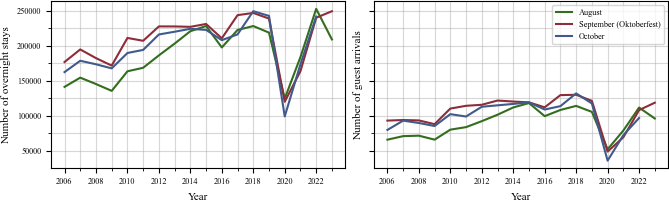

In [532]:
munich_august = tourism_august[tourism_august["Code"] == 9184]
munich_september = tourism_september[tourism_september["Code"] == 9184]
munich_october = tourism_october[tourism_october["Code"] == 9184]

plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=2, usetex=False))
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(1, 2, sharey=True)
axs[0].plot(munich_august['Jahr'], munich_august['Gästeübernachtungen_insgesamt'], color=rgb.tue_darkgreen, label='August')
axs[0].plot(munich_september['Jahr'], munich_september['Gästeübernachtungen_insgesamt'], color=rgb.tue_red, label='September (Oktoberfest)')
axs[0].plot(munich_october['Jahr'], munich_october['Gästeübernachtungen_insgesamt'], color=rgb.tue_darkblue, label='October')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of overnight stays')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))
axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(25000))
axs[0].grid(True, which='both', alpha=0.5)

axs[1].plot(munich_august['Jahr'], munich_august['Gästeankünfte_insgesamt'], color=rgb.tue_darkgreen, label='August')
axs[1].plot(munich_september['Jahr'], munich_september['Gästeankünfte_insgesamt'], color=rgb.tue_red, label='September (Oktoberfest)')
axs[1].plot(munich_october['Jahr'], munich_october['Gästeankünfte_insgesamt'], color=rgb.tue_darkblue, label='October')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of guest arrivals')
axs[1].set_xticks(range(2006, 2024))
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))
axs[1].grid(True, which='both', alpha=0.5)
axs[1].legend()

plt.savefig('venv/fig/visitors_comparison.pdf')
plt.show()

The district of Munich experiences a higher number of guest arrivals and overnight stays in September, which coincides with the Oktoberfest, compared to the preceding and following months. As daily visitor numbers are unavailable, the monthly breakdown provides the most detailed information available. For our analysis, we assume that the majority of visitors to the Oktoberfest are included in the visitor numbers for September, especially the arrival figures, as the Oktoberfest starts in mid-September and most visitors are likely to arrive during this month.

### Load the Oktoberfest dataset and visualize the number of visitors per year

In [533]:
oktoberfest = pd.read_csv("venv/dat/Oktoberfest.csv")
oktoberfest.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


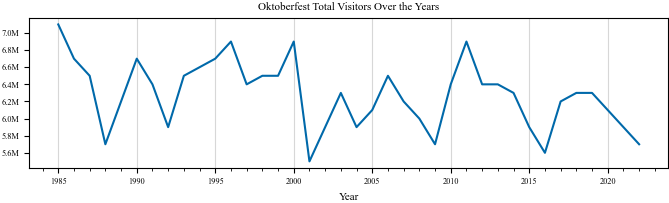

In [534]:
ax = oktoberfest.plot(kind="line", x="jahr", y="besucher_gesamt", color=rgb.tue_blue, legend=None)
plt.xlabel("Year")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}M'))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.title("Oktoberfest Total Visitors Over the Years")
plt.grid(True, which='major', axis='x', alpha=0.5)
plt.show()

A significant difference in the number of visitor to the Oktoberfest and the September tourism figures is apparent upon comparison. In September 2016, the district of Munich had 112,175 guest arrivals, while the number of visitors to the Oktoberfest was 5.6 million. Although the majority of visitors may come from Munich, it is important to consider that some may be accommodated elsewhere. We assumed that due to the high prices in Munich, visitors to the Oktoberfest may choose to stay in neighbouring districts. To analyse this thesis, we will create a heat map showing the number of Oktoberfest visitors in the districts surrounding Munich (i.e. the districts in Upper Bavaria).

## Estimating the number of visitors to the Oktoberfest

To create our heat map, we must establish a method for determining the number of visitors to a district who also visit the Oktoberfest. One possible approach is to calculate the average number of visitors for the preceding month (August) and the following month (October) to estimate the expected number of visitors without the influence of the Oktoberfest. We can then subtract the expected number from the actual number of visitors to determine the number of visitors to the Oktoberfest.

In [535]:
tourism_september['Erwartete_Anzahl_an_Gästeankünften'] = np.nan
oberbayern_counties = []

for code in [9161,9162,9163,9171,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190]:
    oberbayern_counties.append(tourism_august.loc[(tourism_august['Code'] == code) & (tourism_august['Jahr'] == 2006)]['Gemeinde'].iloc[0].strip())
    for year in range(2006, 2024):
        overnight_stays_october = tourism_october.loc[(tourism_october['Code'] == code) & (tourism_october['Jahr'] == year)]['Gästeankünfte_insgesamt']
        overnight_stays_august = tourism_august.loc[(tourism_august['Code'] == code) & (tourism_august['Jahr'] == year)]['Gästeankünfte_insgesamt']
        desired_index = tourism_september[(tourism_september['Code'] == code) & (tourism_september['Jahr'] == year)].index
        tourism_september.loc[desired_index, 'Erwartete_Anzahl_an_Gästeankünften'] = (overnight_stays_august + overnight_stays_october)/2
        
# tourism_september.head()

### Take a look at the expected vs actual number of guest arrivals in the district of Munich (9184) and Ebersberg (9175), a smaller district which borders on Munich

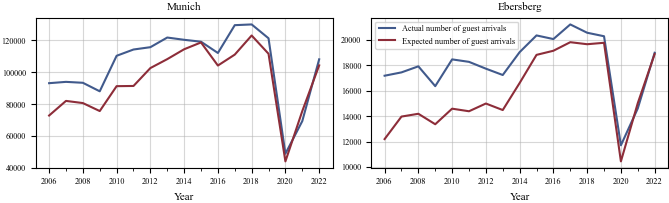

In [536]:
munich_example = tourism_september.loc[tourism_september['Code'] == 9184]
munich_example = munich_example[['Jahr', 'Gästeankünfte_insgesamt', 'Erwartete_Anzahl_an_Gästeankünften']].dropna()
ebersberg_example = tourism_september.loc[tourism_september['Code'] == 9175]
ebersberg_example = ebersberg_example[['Jahr', 'Gästeankünfte_insgesamt', 'Erwartete_Anzahl_an_Gästeankünften']].dropna()

fig, axs = plt.subplots(1, 2)

axs[0].plot(munich_example['Jahr'], munich_example['Gästeankünfte_insgesamt'], label='Actual number of guest arrivals', color=rgb.tue_darkblue)
axs[0].plot(munich_example['Jahr'], munich_example['Erwartete_Anzahl_an_Gästeankünften'], label='Expected number of guest arrivals', color=rgb.tue_red)
axs[0].set_xlabel('Year')
axs[0].set_title('Munich')
axs[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))
axs[0].grid(True, alpha=0.5)

axs[1].plot(ebersberg_example['Jahr'], ebersberg_example['Gästeankünfte_insgesamt'], label='Actual number of guest arrivals', color=rgb.tue_darkblue)
axs[1].plot(ebersberg_example['Jahr'], ebersberg_example['Erwartete_Anzahl_an_Gästeankünften'], label='Expected number of guest arrivals', color=rgb.tue_red)
axs[1].set_xlabel('Year')
axs[1].set_title('Ebersberg')
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))
axs[1].grid(True, alpha=0.5)
axs[1].legend()

plt.savefig('venv/fig/actual_vs_expected_arrivals.pdf')
plt.show()

The Oktoberfest evidently boosts the number of visitors to Munich in September. In the nearby districts around Munich, there are smaller but still noticeable deviations between the observed and actual number of guest arrivals. Importantly, the number of guest arrivals consistently surpasses expectations, indicating the impact of Oktoberfest in these areas.

## Creating the Heatmap

Our method allows for the determination of the number of visitors attending Oktoberfest in all districts of Upper Bavaria from 2006 to 2023. This information can be used to create a heatmap showing where Oktoberfest attendees typically stay. The visualization was created by using the percentage change between the expected and observed number of tourists for the individual counties of Upper Bavaria.

The GeoJSON files were downloaded from the [BayernAtlas](https://v.bayern.de/MFrrH).

In [537]:
# Load the map and add the shapefiles for all of the districts in Upper Bavaria
map = folium.Map(location=[48.0983, 11.7568], zoom_start=9)

for filename in os.listdir('venv/dat/oberbayern_counties'):
    folium.GeoJson(os.path.join('venv/dat/oberbayern_counties', filename), name=filename).add_to(map)
    
# map

In [538]:
combined_data = []
for filename in os.listdir('venv/dat/oberbayern_counties'):
    json_string = geopandas.read_file(os.path.join('venv/dat/oberbayern_counties', filename)).to_json()
    combined_data.append(json_string)
    
out = dict()
out['type'] = 'FeatureCollection'
out['features'] = []
for json_string in combined_data:
    json_dict = json.loads(json_string)
    feature = json_dict['features'][0]
    out['features'].append(feature)

In [539]:
heatmap_data = tourism_september[~tourism_september['Erwartete_Anzahl_an_Gästeankünften'].isnull()]
# Compute the percentage change between the expected and the actual number of guest arrivals. Positive entries -> there are more guests than we would expect to see!
heatmap_data.loc[:, 'Prozentuale_Veränderung'] = ((heatmap_data['Gästeankünfte_insgesamt'] - heatmap_data['Erwartete_Anzahl_an_Gästeankünften']) / heatmap_data['Gästeankünfte_insgesamt']) * 100
heatmap_data.loc[:, 'Gemeinde'] = heatmap_data['Gemeinde'].str.strip()
# Store the heatmap data for the years 2006 to 2022
full_heatmap_data = []
for year in range(2006, 2023):
    df = heatmap_data[heatmap_data['Jahr'] == year]
    full_heatmap_data.append(df)

C:\Users\julia\AppData\Local\Temp\ipykernel_8204\3806029354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data.loc[:, 'Prozentuale_Veränderung'] = ((heatmap_data['Gästeankünfte_insgesamt'] - heatmap_data['Erwartete_Anzahl_an_Gästeankünften']) / heatmap_data['Gästeankünfte_insgesamt']) * 100


In [540]:
for county in out['features']:
    name = county['properties']['name']
    if 'Landkreis' in name:
        new_name = ' '.join(name.split()[1:]) + " (Lkr)"
        county['properties']['name'] = new_name
    elif 'Stadt' in name:
        if 'München' in name:
            new_name = 'München, Landeshauptstadt'
        else:
            new_name = name.split()[1] + ' (Krfr.St)'
        county['properties']['name'] = new_name

In [541]:
# Show the heatmap for the most recent year 2022
folium.Choropleth(
    geo_data=out,
    name="choropleth",
    data=full_heatmap_data[16],
    columns=["Gemeinde", "Prozentuale_Veränderung"],
    key_on="feature.properties.name",
    fill_color='PuOr',
    fill_opacity=0.8,
    legend_name="Percentage change between the actual and expected number of guest arrivals (%)",
    bins=list(range(-30, 31, 1))
).add_to(map)

folium.LayerControl().add_to(map)
map

## Let's create a nice animation of the heatmap over the years!

In [542]:
for year in range(2006, 2023):
    m = folium.Map(location=[48.1800, 11.7568], zoom_start=9)
    
    # Add year label to the map
    title_html = '''
                 <h3 align="left" style="font-size:22px"><b>{}</b></h3>
                 '''.format('Year: ' + str(year))   
    m.get_root().html.add_child(folium.Element(title_html))
    
    for filename in os.listdir('venv/dat/oberbayern_counties'):
        folium.GeoJson(os.path.join('venv/dat/oberbayern_counties', filename), name=filename).add_to(m)
        
    folium.Choropleth(geo_data=out,
                      name="choropleth",
                      data=full_heatmap_data[year-2006],
                      columns=["Gemeinde", "Prozentuale_Veränderung"],
                      key_on="feature.properties.name",
                      fill_color='PuOr',
                      fill_opacity=0.8,
                      legend_name="Percentage change between the actual and expected number of guest arrivals (%)",
                      bins=list(range(-30, 31, 1))
                      ).add_to(m)
    
    m.save('venv/GifMap/visitors_heatmap_' + str(year) + '.html')  

In [543]:
# Turn off ZoomControl
for year in range(2006, 2023):
    with fileinput.FileInput('venv/GifMap/visitors_heatmap_' + str(year) + '.html', inplace=True) as file:
        for line in file:
            print(line.replace('zoomControl: true', 'zoomControl: false'), end='')

In [544]:
# Convert html files to png (screenshot each html page)
path = 'C:\\Users\julia\Documents\\Uni\Master\Semester_1\Group_Project_DataLit'
os.chdir(path)

for year in range(2006, 2023):
    file_name='venv/GifMap/visitors_heatmap_' + str(year) + '.html'
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=file_name)

    browser = webdriver.Firefox()
    browser.get(tmpurl)
    time.sleep(5)
    browser.save_screenshot('venv/fig/gif_images/visitors_heatmap_' + str(year) + '.png')
    browser.quit()
    
    # Remove html files
    os.remove('venv/GifMap/visitors_heatmap_' + str(year) + '.html')

In [545]:
# Create GIF
image_list = []
for file_name in os.listdir('venv/fig/gif_images'):
    image_list.append(imageio.v2.imread('venv/fig/gif_images/' + file_name))
    os.remove('venv/fig/gif_images/' + file_name)
    
imageio.mimwrite('venv/fig/GifMap.gif', image_list, fps=1)

## Validation of our method

 We have to make sure that our method of computing the number of visitors in August that we would expect to see if there was no Oktoberfest is valid. To prove the validity of the method, we have applied the method to three consecutive months (February, March, April), which we assume to have similar visitor numbers, as no special event takes place in any of the months. If our assumption is correct, it should be possible to reliably estimate the number of visitors for March using the average number of visitors for February and April. Validation also works with any three consecutive months, as long as none of them are expected to have an unusually high or low number of visitors, such as during Christmas markets or similar events.

### First, we load all data for the months of February, March and April

In [556]:
directory = "venv/dat/tourism_february"
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["Februar"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_february = pd.concat(results, axis=0, ignore_index=True)
tourism_february.replace('-', np.nan, inplace=True)
tourism_february.replace('.', np.nan, inplace=True)
tourism_february = tourism_february.astype(convert_dict)

# tourism_february.info()

In [555]:
directory = "venv/dat/tourism_march"
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["März"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_march = pd.concat(results, axis=0, ignore_index=True)
tourism_march.replace('-', np.nan, inplace=True)
tourism_march.replace('.', np.nan, inplace=True)
tourism_march = tourism_march.astype(convert_dict)

# tourism_march.info()

In [554]:
directory = "venv/dat/tourism_april"
results = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    df = pd.read_csv(
        f,
        encoding="cp1252",
        skiprows=10,
        names=column_names,
        sep=";",
        skipfooter=6,
        engine="python",
        decimal=","
    )
    df = df.assign(Monat=["April"]*df.shape[0], Jahr=[filename[-8:-4]]*df.shape[0])
    df.set_index(["Code", "Gemeinde", "Jahr"])
    results.append(df)
    
tourism_april = pd.concat(results, axis=0, ignore_index=True)
tourism_april.replace('-', np.nan, inplace=True)
tourism_april.replace('.', np.nan, inplace=True)
tourism_april = tourism_april.astype(convert_dict)

# tourism_april.info()

### Now we apply our method to compute the expected number of guest arrivals in March

In [549]:
tourism_march['Erwartete_Anzahl_an_Gästeankünften'] = np.nan
oberbayern_counties = [9161,9162,9163,9171,9172,9173,9174,9175,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190]

for code in oberbayern_counties:
    for year in range(2006, 2024):
        overnight_stays_february = tourism_february.loc[(tourism_february['Code'] == code) & (tourism_february['Jahr'] == year)]['Gästeankünfte_insgesamt']
        overnight_stays_april = tourism_april.loc[(tourism_april['Code'] == code) & (tourism_april['Jahr'] == year)]['Gästeankünfte_insgesamt']
        desired_index = tourism_march[(tourism_march['Code'] == code) & (tourism_march['Jahr'] == year)].index
        tourism_march.loc[desired_index, 'Erwartete_Anzahl_an_Gästeankünften'] = (overnight_stays_february + overnight_stays_april)/2

### Now let's evaluate the performance of our method

In [550]:
oberbayern_march = tourism_march[tourism_march['Code'].isin(oberbayern_counties)]
oberbayern_september = tourism_september[tourism_september['Code'].isin(oberbayern_counties)]
# We exclude the years in which the Oktoberfest did not take place (2020, 2021) and 2023 since there is no data available for October 2023
oberbayern_march = oberbayern_march[~oberbayern_march['Jahr'].isin([2020,2021,2023])]
oberbayern_september = oberbayern_september[~oberbayern_september['Jahr'].isin([2020,2021,2023])]

In [551]:
actual_visitors_march = oberbayern_march['Gästeankünfte_insgesamt'] 
expected_visitors_march = oberbayern_march['Erwartete_Anzahl_an_Gästeankünften']

actual_visitors_september = oberbayern_september['Gästeankünfte_insgesamt']
expected_visitors_september = oberbayern_september['Erwartete_Anzahl_an_Gästeankünften']

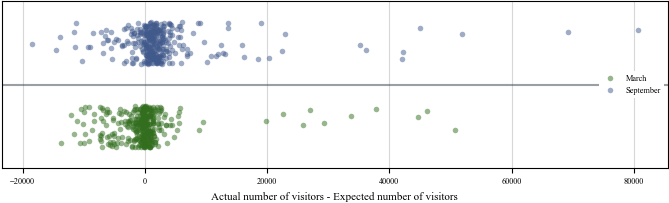

In [552]:
diff_march = actual_visitors_march - expected_visitors_march
diff_september = actual_visitors_september - expected_visitors_september

fig, ax = plt.subplots()
np.random.seed(1)
u_m = np.random.rand(len(diff_march))
u_s = np.random.rand(len(diff_september))

# Plot the difference between the estimated and actual number of visitors for all counties and years.
ax.plot(diff_march, 0.5 * u_m, "o", label='March', color=rgb.tue_darkgreen, alpha=0.5, mec="none", ms=4)
ax.plot(diff_september, 1 + 0.5 * u_s, "o", label='September', color=rgb.tue_darkblue, alpha=0.5, mec="none", ms=4)
ax.yaxis.set_visible(False)
ax.set_ylim(-0.25, 1.75)
ax.axhline(0.75, color=rgb.tue_dark, alpha=0.5)
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(True, alpha=0.5)
ax.set_xlabel('Actual number of visitors - Expected number of visitors')

plt.savefig('venv/fig/validation_total.pdf')
plt.show()

The data for March is centred around zero, indicating the effectiveness of our method. Assuming similar visitor numbers for February, March and April, we can estimate the number of visitors for March by calculating the average of February and April. In September, there seems to be a shift towards the right. To examine this more closely, we will zoom in on the region [-15000, 15000]. 

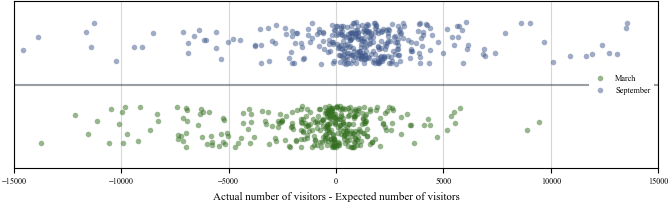

In [553]:
fig, ax = plt.subplots()
ax.plot(diff_march, 0.5 * u_m, "o", label='March', color=rgb.tue_darkgreen, alpha=0.5, mec="none", ms=4)
ax.plot(diff_september, 1 + 0.5 * u_s, "o", label='September', color=rgb.tue_darkblue, alpha=0.5, mec="none", ms=4)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_xlim(-15000,15000)
ax.set_ylim(-0.25, 1.75)
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(True, alpha=0.5)
ax.set_xlabel('Actual number of visitors - Expected number of visitors')
# Plot the mean
# ax.axvline(diff_march.mean(), color=rgb.tue_darkgreen)
# ax.axvline(diff_september.mean(), color=rgb.tue_darkblue)
# Add error bars for the means
# ax.errorbar(x=[diff_march.mean()], y=[0.25], xerr=[diff_march.std()], color=rgb.tue_darkgreen)
# ax.errorbar(x=[diff_september.mean()], y=[1.25], xerr=[diff_september.std()], color=rgb.tue_darkblue)

plt.savefig('venv/fig/validation_zoom.pdf')
plt.show()

The figure demonstrates that our method can accurately predict visitor numbers when similar numbers are assumed for the three months. This makes it suitable for calculating deviations in visitor numbers caused by the Oktoberfest. The deviations are visible in the figure as a shift to the right and are further illustrated in our district-specific heat map.